# Python and Numpy Tutorial

http://cs231n.github.io/python-numpy-tutorial/#python-dicts

Python은 자체적으로 가장 보편적인 프로그래밍 언어이지만 numpy, scipy, matplotlib 와 함께 과학 분야에서 강력함 힘을 발휘한다. 본 장에서는 다음 목차와 같은 내용을 간략히 설명한다. 각 분야에 대한 설명은 인터넷에서 키워드를 통해 검색할 수 있을 것이다. 

- Python
  - Basic data types
  - Containers
    - Lists
    - Dictionaries
    - Sets
    - Tuples
  - Functions
  - Classes
- Numpy
  - Arrays
  - Array indexing
  - Datatypes
  - Array math
  - Broadcasting
- SciPy
- Matplotlib
  - Plotting
  - Subplots
  - Images

## Python
Python은 동적(dynamic <-> static) 타입을 가진 고급프로그랭 언어 언어이다. Python 코드는 종종 의사코드(pseudo code)와 가장 비슷하다는 평을 받는데 이는 강력한 알고리즘을 직관적으로 적은 라인으로 읽기 쉽게 나타낼 수 있기 때문이다.

In [1]:
def bubble_sort(a):
    n = len(a)
    for i in range(n-1):
        for j in range(i, n):
            if a[i] > a[j]:
                a[i], a[j] = a[j], a[i]
    return a
print(bubble_sort([3,6,8,10,1,2,1,3]))

[1, 1, 2, 3, 3, 6, 8, 10]


In [2]:
def quick_sort(a): # 재귀 함수
    n = len(a)
    if n <= 1: return a
    p = a[n // 2]
    L = [x for x in a if x  < p]
    M = [x for x in a if x == p]
    R = [x for x in a if x  > p]
    return quick_sort(L) + M + quick_sort(R)

print(quick_sort([3,6,8,10,1,2,1,3]))

[1, 1, 2, 3, 3, 6, 8, 10]


### 기본 테이터 타입

다른 언어와 마찬가지로 Python에는 **integer, float, boolean, string**  타입이 있다. 

**Numbers:** 숫자는 정수(integer)와 부동소수점(float)으로 구분할 수 있다. 

In [61]:
x = 3
print(type(x)) # Prints "<class 'int'>"
print(x, x + 1, x - 1, x*2, x**2)
x += 1 # x = x + 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'int'>
3 4 2 6 9
4
8
<class 'float'>
2.5 3.5 5.0 6.25


다른 언어에 있는 'x++' 형태는 존재하지 않는다. 

Python에는 복소수 타입도 존재한다. 

**Booleans:** 논리 함수는 다음과 같다. 

In [62]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


**Strings:** Python은 강력한 문자열 처리 기능을 가진다. 

In [63]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello
5
hello world
hello world 12


스트링 객체는 다양하면서도 유용한 메서드를 가진다. 

In [4]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


### Containers
Python에는 다양한 컨테이너 타입이 있다. **list, dictionary, set, tuple.**

**Lists**

리스트는 다른 언어의 어레이(array)와 같은 기능이다. 리스트는 크기를 조절할 수가 있고 다른 타입을 요소로 가질 수 있다. 

In [5]:
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


**Slicing:** 리스트 요소를 개별적으로 취할 수 있고, 슬라이싱을 통해 서브리스트를 취할 수도 있다. 

In [6]:
nums = list(range(5))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


슬라이싱은 numpy array에서 다시 보게 될 것이다. 

**Loops:** 다음과 같이 loop를 통해 리스트 요소를 얻을 수 있다. 

In [7]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


**List comprehensions:** 프로그래밍을 하다보면 하나의 데이터를 다른 타입으로 변경하고자 할 때가 있다. 간단한 예제로 숫자의 제곱을 구하는 다음 코드를 보자.

In [3]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


이러한 코드를 다음과 같이 **list comprehension**을 통해 간단히 구할 수 있다. 

In [9]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


**List comprehension**은 조건을 부가할 수 있다. 

In [11]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # Prints "[0, 4, 16]"

[0, 4, 16]


**Dictionaries**

Dictionary 는 (key, value) 페어를 저장할 수 있다. 

In [12]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Loop를 통해 key와 value를 얻으려면 **items** 메소드를 사용한다. 

In [13]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


**Dictionary comprehensions:** 이것은 list comprehension과 비슷하다. 딕셔너리를 쉽게 구성할 수 있다. 

In [14]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


**Sets**

집합은 순서가 없는 요소들의 모임이다. 

In [15]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

True
False
True
3
3
2


**Loops:** 집합에서 반복은 리스트 반복과 같은 문법을 가지지만 집합에서는 순서가 없기 때문에 집합 요소의 순서를 가정하 수는 없다. 

In [16]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: cat
#2: fish
#3: dog


**Set comprehensions:** 리스트나 딕셔너리와 같이 집합도 set comprehension을 통해 쉽게 구성할 수 있다. 

In [17]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # Prints "{0, 1, 2, 3, 4, 5}"

{0, 1, 2, 3, 4, 5}


**Tuples**

튜플은 리스트와 비슷하지만 값을 바꿀 수 없다는 점이 다르다. 또한 튜플은 딕셔너리의 key로 사용되고 집합의 요소를 쓰인다. 

### Functions

Python functions are defined using the **def** keyword. For example:

In [18]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# Prints "negative", "zero", "positive"

negative
zero
positive


**keyword argument**

$$x = e^{-x}$$

In [5]:
import numpy as np
def fixed_point_iteration(fun, x, tol=1e-6):
    while 1:
        print(x)
        xold = x
        x = fun(x)
        if np.abs(x-xold) < tol:
            return x
x = fixed_point_iteration(lambda x: np.exp(-x), 2.0)
print(x)    

2.0
0.1353352832366127
0.8734230184931167
0.417519921988008
0.6586783695347459
0.5175348725542395
0.5959879247824047
0.5510179326126039
0.5763628131651558
0.5619385295108967
0.5701028308007828
0.5654672882556921
0.5680946207793744
0.5666040063330399
0.5674492242407414
0.566969808628573
0.5672416879728515
0.5670874876375709
0.5671749394606749
0.5671253411469632
0.567153470305121
0.5671375169798328
0.5671465647812954
0.5671414333749911
0.5671443436155845
0.5671426930914951
0.5671436291749448


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this tutorial useful to get started with Numpy.


### Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [6]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [10]:
b[0][0], b[0,0]

(1, 1)

Numpy also provides many functions to create arrays:

In [21]:
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.32127997 0.68643491]
 [0.88697698 0.08265139]]


### Array indexing
Numpy offers several ways to index into arrays.

**Slicing:** Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [14]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
#     0  1  2  3
# [[ 1  2  3  4]    0
#  [ 5  6  7  8]    1
#  [ 9 10 11 12]]   2 
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3].copy()
print(b)

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"
print(a)
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]
2
2
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[77  3]
 [ 6  7]]


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [15]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing:** When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [1]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])
print(a)

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[[1 2]
 [3 4]
 [5 6]]
[1 4 5]
[1 4 5]
[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [18]:
import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing:** Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [19]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])
print(a)

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[1 2]
 [3 4]
 [5 6]]
[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


### Datatypes
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [21]:
import numpy as np

x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

x = np.array([1.0, 2])
print(x.dtype)   
print(x)

int32
float64
int64
float64
[1. 2.]


### Array math
Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [28]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, ``*`` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [29]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [22]:
import numpy as np

x = np.array([[1,2],[3,4]])
print(x)

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

[[1 2]
 [3 4]]
10
[4 6]
[3 7]


Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [23]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

v = np.array([[1,2,3]])
print(v.shape)
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]
(1, 3)
[[1 2 3]]
[[1]
 [2]
 [3]]


### Broadcasting
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [24]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
print(x)
print(v)
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[1 0 1]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector `v` to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [33]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`. Consider this version, using broadcasting:

In [34]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape (4, 3) and `v` has shape (3,) due to broadcasting; this line works as if `v` actually had shape (4, 3), where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

- If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
- The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
- The arrays can be broadcast together if they are compatible in all dimensions.
- After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
- In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the documentation or this explanation.

Functions that support broadcasting are known as *universal functions.*

Here are some applications of broadcasting:

In [26]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1))) # (3,1)           -> (3,3)
print(w)                     # (3,)  -> (1,3)  -> (3,3) 
print(np.reshape(v, (3, 1)) * w)

# # Add a vector to each row of a matrix
# x = np.array([[1,2,3], [4,5,6]])
# # x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# # giving the following matrix:
# # [[2 4 6]
# #  [5 7 9]]
# print(x + v)

# # Add a vector to each column of a matrix
# # x has shape (2, 3) and w has shape (2,).
# # If we transpose x then it has shape (3, 2) and can be broadcast
# # against w to yield a result of shape (3, 2); transposing this result
# # yields the final result of shape (2, 3) which is the matrix x with
# # the vector w added to each column. Gives the following matrix:
# # [[ 5  6  7]
# #  [ 9 10 11]]
# print((x.T + w).T)
# # Another solution is to reshape w to be a column vector of shape (2, 1);
# # we can then broadcast it directly against x to produce the same
# # output.
# print(x + np.reshape(w, (2, 1)))

# # Multiply a matrix by a constant:
# # x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# # these can be broadcast together to shape (2, 3), producing the
# # following array:
# # [[ 2  4  6]
# #  [ 8 10 12]]
# print(x * 2)

[[1]
 [2]
 [3]]
[4 5]
[[ 4  5]
 [ 8 10]
 [12 15]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

### SciPy
Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. SciPy builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

The best way to get familiar with SciPy is to browse the documentation. We will highlight some parts of SciPy that you might find useful for this class.

### Matplotlib
Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.


### Plotting
The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

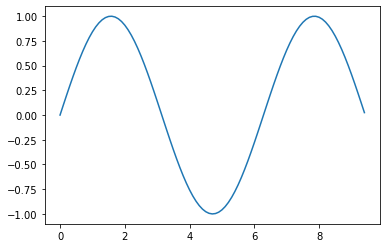

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y);
# plt.show()  # You must call plt.show() to make graphics appear.

In [30]:
y

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

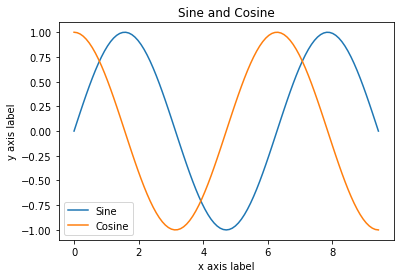

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.linspace(0, 3*np.pi, 101)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine']);
# plt.show()

### Subplots
You can plot different things in the same figure using the `subplot` function. Here is an example:

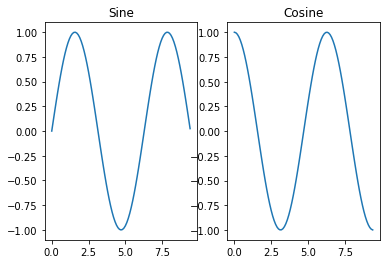

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(1, 2, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(1, 2, 2)
plt.plot(x, y_cos)
plt.title('Cosine');

# Show the figure.
# plt.show()